https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

https://benalexkeen.com/k-means-clustering-in-python/#:~:text=K-means%20clustering%20is%20a,observation%20with%20the%20nearest%20centroid

https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad

## Dataset

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

data = sns.load_dataset("iris")
print(data)
df = pd.DataFrame(data)
df = df.iloc[:, 0:4]

print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0  

## Model Fit

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)

y_pred = kmeans.fit_predict(df)

In [4]:
df['species_predict'] = y_pred

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


#### Cluster Scatter Plot 

In [16]:
centers = kmeans.cluster_centers_ # verilen classların merkezleri
print(centers)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


In [17]:
labels = kmeans.labels_ # her bir gözlemin hangi sınıfa ait olduğunu görebiiriz 
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


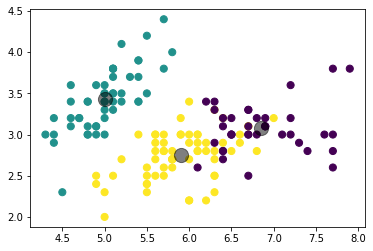

In [20]:
import matplotlib.pyplot as plt

plt.scatter(df.iloc[:,0], df.iloc[:, 1], c = labels, s = 50, cmap="viridis")

plt.scatter(centers[:,0], centers[:,1], c = "black", s=200, alpha = 0.5)

## Elbow Method

Elbow metodu; noktaların her K değerine göre küme merkezine uzaklıklarının karesi toplamı hesaplanmaktadır. Bu değerlere göre her K değeri için grafik çizilmektedir. Grafik üzerinde toplamlar arasındaki farkın azalmaya başladığı dirsek noktası en uygun K değeri olarak belirlenmektedir

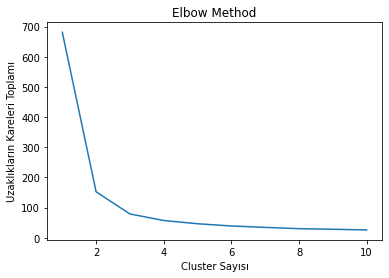

In [21]:
X = np.array(df.drop(['species_predict'], 1).astype(float))

# WCSS, tüm kümelerdeki her veri noktasının kendi ağırlık merkezlerine olan uzaklıklarının karelerinin toplamıdır. 
# Fikir, toplamı en aza indirmektir
# !! Kümeler arası fark en fazla, küme içi fark en az olması amaçlanmaktadır !!

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i) # sckit-learn ile istenilen parametreler verilerek taranabilir
    kmeans.fit(X)
    
    # “K-Means” kayıp fonksiyonunu(inertia) minimize eden k değerlerini bulmayı amaçlamaktadır.
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Sayısı')
plt.ylabel('Uzaklıkların Kareleri Toplamı')
plt.show()

##### pip install yellowbrick

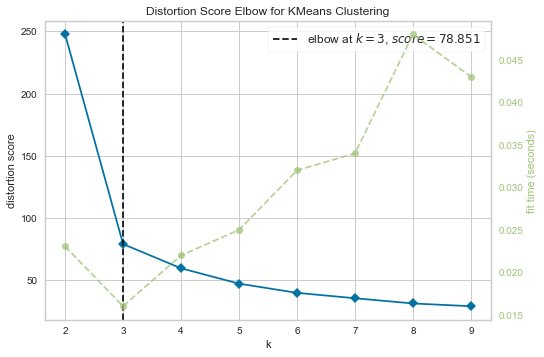

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(2,10)) 

visualizer.fit(df)
visualizer.poof() 